In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Patient Data.csv')

In [3]:
df.head()

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI
0,Female,80.0,0,0,0,1,never,25.19
1,Female,54.0,0,0,0,0,NaN,NaN
2,Male,28.0,0,0,0,0,never,NaN
3,Female,36.0,0,0,0,0,current,23.45
4,Male,76.0,0,1,0,1,current,20.14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   gender           100000 non-null  object 
 1   age              100000 non-null  float64
 2   diabetes         100000 non-null  int64  
 3   hypertension     100000 non-null  int64  
 4   stroke           100000 non-null  int64  
 5   heart disease    100000 non-null  int64  
 6   smoking history  64184 non-null   object 
 7   BMI              74556 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 6.1+ MB


In [5]:
df.describe()

,age,diabetes,hypertension,stroke,heart disease,BMI
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,74556.000000
mean,41.885856,0.085000,0.07485,0.014260,0.039420,27.321029
std,22.516840,0.278883,0.26315,0.118561,0.194593,7.686296
min,0.080000,0.000000,0.00000,0.000000,0.000000,10.010000
25%,24.000000,0.000000,0.00000,0.000000,0.000000,22.030000
50%,43.000000,0.000000,0.00000,0.000000,0.000000,26.500000
75%,60.000000,0.000000,0.00000,0.000000,0.000000,31.530000
max,80.000000,1.000000,1.00000,1.000000,1.000000,95.690000


In [6]:
pd.DataFrame(df['gender'].value_counts())

,gender
Female,58552
Male,41430
Other,18


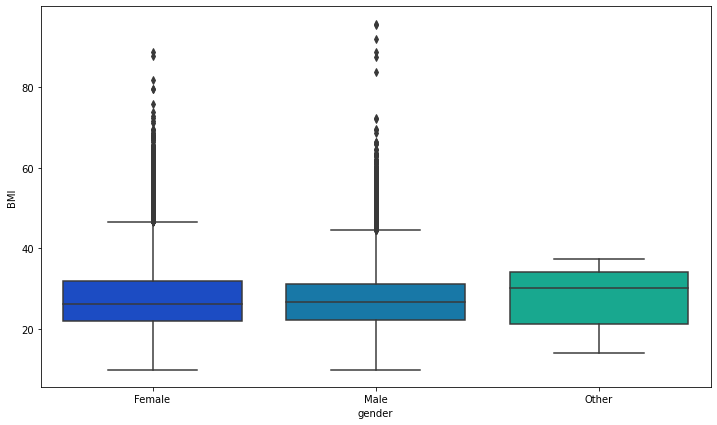

In [7]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='gender', y='BMI',data=df, palette='winter')

In [8]:
df.drop(df[df['gender']=='Other'].index,inplace=True)

In [9]:
pd.DataFrame(df['gender'].value_counts())

,gender
Female,58552
Male,41430


In [10]:
df.dropna

<bound method DataFrame.dropna of        gender   age  diabetes  hypertension  stroke  heart disease  \
0      Female  80.0         0             0       0              1   
1      Female  54.0         0             0       0              0   
2        Male  28.0         0             0       0              0   
3      Female  36.0         0             0       0              0   
4        Male  76.0         0             1       0              1   
...       ...   ...       ...           ...     ...            ...   
99995  Female  80.0         0             0       0              0   
99996  Female   2.0         0             0       0              0   
99997    Male  66.0         0             0       0              0   
99998  Female  24.0         0             0       0              0   
99999  Female  57.0         0             0       0              0   

      smoking history    BMI  
0               never  25.19  
1                 NaN    NaN  
2               never    NaN  
3

In [11]:
df.isnull().sum()

gender                 0
age                    0
diabetes               0
hypertension           0
stroke                 0
heart disease          0
smoking history    35810
BMI                25437
dtype: int64

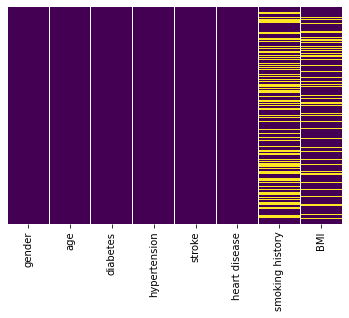

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("RawData.png")

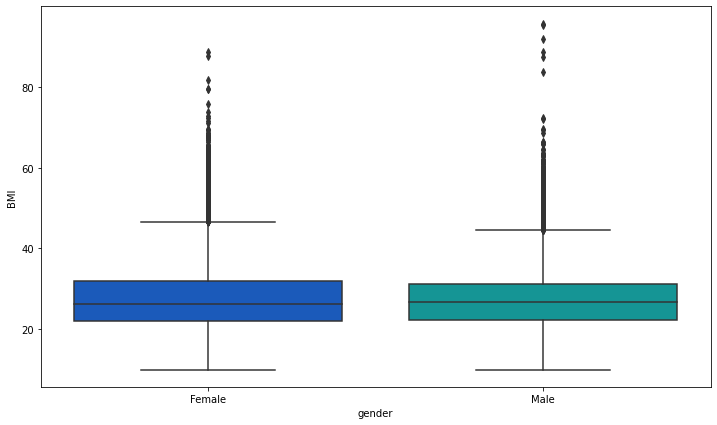

In [13]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='gender', y='BMI',data=df, palette='winter')

In [14]:
def impute_bmi(cols):
    BMI = cols[0]
    gender = cols[1]
    
    if pd.isnull(BMI):

        if gender == 'female':
            return 25

        elif gender == 'male':
            return 27

        else:
            return 30

    else:
        return BMI

In [15]:
df['BMI'] = df[['BMI','gender']].apply(impute_bmi, axis = 1)


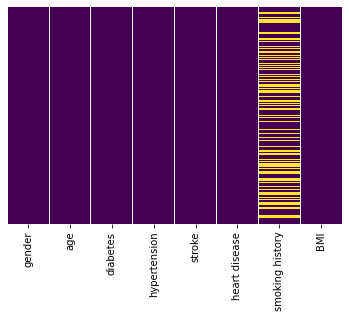

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("CleanBMI.png")

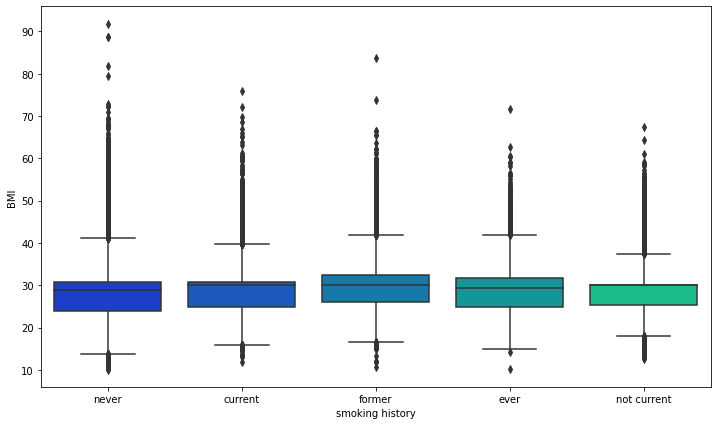

In [17]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='smoking history', y='BMI',data=df, palette='winter')

In [18]:
def impute_sh(cols):
    smoking_history = cols[0]
    BMI = cols[1]
    
    if pd.isnull(smoking_history):

        if BMI == 27:
            return 'never'

        elif BMI == 28:
            return 'current'
        
        elif BMI == 29:
            return 'former'
        
        elif BMI == 28:
            return 'ever'

        else:
            return 'not current'

    else:
        return smoking_history

In [19]:
df['smoking history'] = df[['smoking history','BMI']].apply(impute_sh,axis=1)

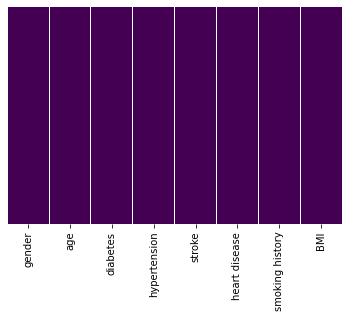

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("CleanSH.png")

In [21]:
df.to_csv('Cleaned_df.csv', index = False)

In [22]:
df = pd.read_csv('Cleaned_df.csv')

In [23]:
df.isnull().sum()

gender             0
age                0
diabetes           0
hypertension       0
stroke             0
heart disease      0
smoking history    0
BMI                0
dtype: int64

In [24]:
df.head()

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI
0,Female,80.0,0,0,0,1,never,25.19
1,Female,54.0,0,0,0,0,not current,30.00
2,Male,28.0,0,0,0,0,never,30.00
3,Female,36.0,0,0,0,0,current,23.45
4,Male,76.0,0,1,0,1,current,20.14


In [25]:
smoked = pd.get_dummies(df['smoking history'],drop_first=True,prefix='smoked')

In [26]:
df = pd.concat([df,smoked],axis=1)

In [27]:
df

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI,smoked_ever,smoked_former,smoked_never,smoked_not current
0,Female,80.0,0,0,0,1,never,25.19,0,0,1,0
1,Female,54.0,0,0,0,0,not current,30.00,0,0,0,1
2,Male,28.0,0,0,0,0,never,30.00,0,0,1,0
3,Female,36.0,0,0,0,0,current,23.45,0,0,0,0
4,Male,76.0,0,1,0,1,current,20.14,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99977,Female,80.0,0,0,0,0,not current,30.00,0,0,0,1
99978,Female,2.0,0,0,0,0,not current,17.37,0,0,0,1
99979,Male,66.0,0,0,0,0,former,27.83,0,1,0,0
99980,Female,24.0,0,0,0,0,never,35.42,0,0,1,0


In [28]:
gndr = pd.get_dummies(df['gender'],drop_first=True,prefix='gndr')

In [29]:
df = pd.concat([df,gndr],axis=1)

In [30]:
df

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI,smoked_ever,smoked_former,smoked_never,smoked_not current,gndr_Male
0,Female,80.0,0,0,0,1,never,25.19,0,0,1,0,0
1,Female,54.0,0,0,0,0,not current,30.00,0,0,0,1,0
2,Male,28.0,0,0,0,0,never,30.00,0,0,1,0,1
3,Female,36.0,0,0,0,0,current,23.45,0,0,0,0,0
4,Male,76.0,0,1,0,1,current,20.14,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99977,Female,80.0,0,0,0,0,not current,30.00,0,0,0,1,0
99978,Female,2.0,0,0,0,0,not current,17.37,0,0,0,1,0
99979,Male,66.0,0,0,0,0,former,27.83,0,1,0,0,1
99980,Female,24.0,0,0,0,0,never,35.42,0,0,1,0,0


In [31]:
df.drop(['smoking history'],1,inplace=True)

In [32]:
df.keys()

Index(['gender', 'age', 'diabetes', 'hypertension', 'stroke', 'heart disease',
       'BMI', 'smoked_ever', 'smoked_former', 'smoked_never',
       'smoked_not current', 'gndr_Male'],
      dtype='object')

In [33]:
x=df[['age', 'diabetes','stroke', 'heart disease', 'BMI', 'smoked_ever', 'smoked_former',
       'smoked_never', 'smoked_not current', 'gndr_Male']]
y=df['hypertension']

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=101)

In [35]:
x_train

,age,diabetes,stroke,heart disease,BMI,smoked_ever,smoked_former,smoked_never,smoked_not current,gndr_Male
57213,35.0,0,0,0,39.87,0,0,1,0,0
96200,39.0,0,0,0,28.13,0,0,1,0,0
85830,67.0,0,0,0,23.60,0,0,1,0,0
5013,44.0,0,0,0,30.00,0,0,0,1,1
86294,56.0,0,0,0,43.28,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
5695,38.0,1,0,0,19.26,0,0,0,0,1
73542,5.0,0,0,0,15.29,0,0,1,0,0
83281,55.0,0,0,0,34.45,0,0,1,0,0
83467,80.0,0,1,1,20.66,0,0,0,1,1


In [36]:
x_test

,age,diabetes,stroke,heart disease,BMI,smoked_ever,smoked_former,smoked_never,smoked_not current,gndr_Male
69015,30.0,0,0,0,30.00,0,0,0,1,0
23361,70.0,0,0,0,25.85,0,1,0,0,1
54418,71.0,0,0,0,30.00,0,0,0,1,1
73939,33.0,0,0,0,21.82,0,0,0,1,0
42265,64.0,0,0,0,37.04,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
76645,28.0,0,0,0,36.71,0,0,1,0,0
39529,64.0,0,0,1,21.34,0,0,0,1,1
57735,64.0,0,1,0,33.11,0,0,1,0,1
55402,0.8,0,0,0,11.47,0,0,0,1,1


In [37]:
y_train

57213    0
96200    0
85830    1
5013     0
86294    0
        ..
5695     0
73542    0
83281    0
83467    1
45919    0
Name: hypertension, Length: 69987, dtype: int64

In [38]:
y_test

69015    0
23361    1
54418    0
73939    0
42265    0
        ..
76645    0
39529    0
57735    1
55402    0
94682    0
Name: hypertension, Length: 29995, dtype: int64

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(50,'Score'))  #print 10 best features

                Specs         Score
0                 age  76342.944594
1            diabetes   3579.607070
4                 BMI   2995.956121
3       heart disease   1411.998880
8  smoked_not current    740.161823
6       smoked_former    628.231393
2              stroke    594.173356
7        smoked_never    136.616222
5         smoked_ever     51.354211
9           gndr_Male     12.109606


In [40]:
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [41]:
classifier = []
classifier.append(("LogisticReg", LogisticRegression(solver='liblinear',multi_class='ovr')))
classifier.append(("DecisionTree", DecisionTreeClassifier(criterion ='entropy')))
classifier.append(("KNN", KNeighborsClassifier()))
classifier.append(("KernelSVM", SVC(gamma='auto')))
classifier.append(("NaiveBayes", GaussianNB()))
classifier.append(("RandomForest", RandomForestClassifier()))


In [ ]:
seed = 0
results = []
names = []
for name, model in classifier:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train,cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\ajidahun bade\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LogisticReg: 0.924643 (0.001996)


C:\Users\ajidahun bade\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


DecisionTree: 0.884979 (0.004373)


C:\Users\ajidahun bade\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNN: 0.917613 (0.002554)


C:\Users\ajidahun bade\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [41]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_train=mms.fit_transform(x_train)
x_test=mms.transform(x_test)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [44]:
predictions = logmodel.predict(x_test)
pd.DataFrame(predictions).head(50)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [45]:
cm_log = confusion_matrix(y_test, predictions)
cm_log

array([[27677,    37],
       [ 2252,    29]], dtype=int64)

In [46]:
accuracy_score = accuracy_score(y_test, predictions)
print(accuracy_score*100)

92.36872812135356


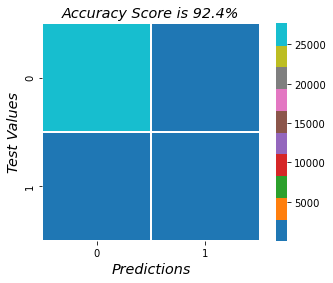

In [47]:
sns.heatmap(cm_log, vmin=None,vmax=None,cmap='tab10',center=None,robust=False,annot=None,fmt='.5g',annot_kws=None,linewidths=0.5,xticklabels='auto',
    yticklabels='auto',linecolor='white',square=True)
plt.title("Accuracy Score is 92.4%", fontstyle ='italic', fontsize = 'x-large')
plt.ylabel("Test Values", fontstyle ='italic', fontsize = 'x-large')
plt.xlabel("Predictions", fontstyle ='italic', fontsize = 'x-large')
plt.savefig("Confusion_Matrix.png")

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     27714
           1       0.44      0.01      0.02      2281

    accuracy                           0.92     29995
   macro avg       0.68      0.51      0.49     29995
weighted avg       0.89      0.92      0.89     29995



### Here we have the Plots: Majorly of 'Hypertension' versus other variables...

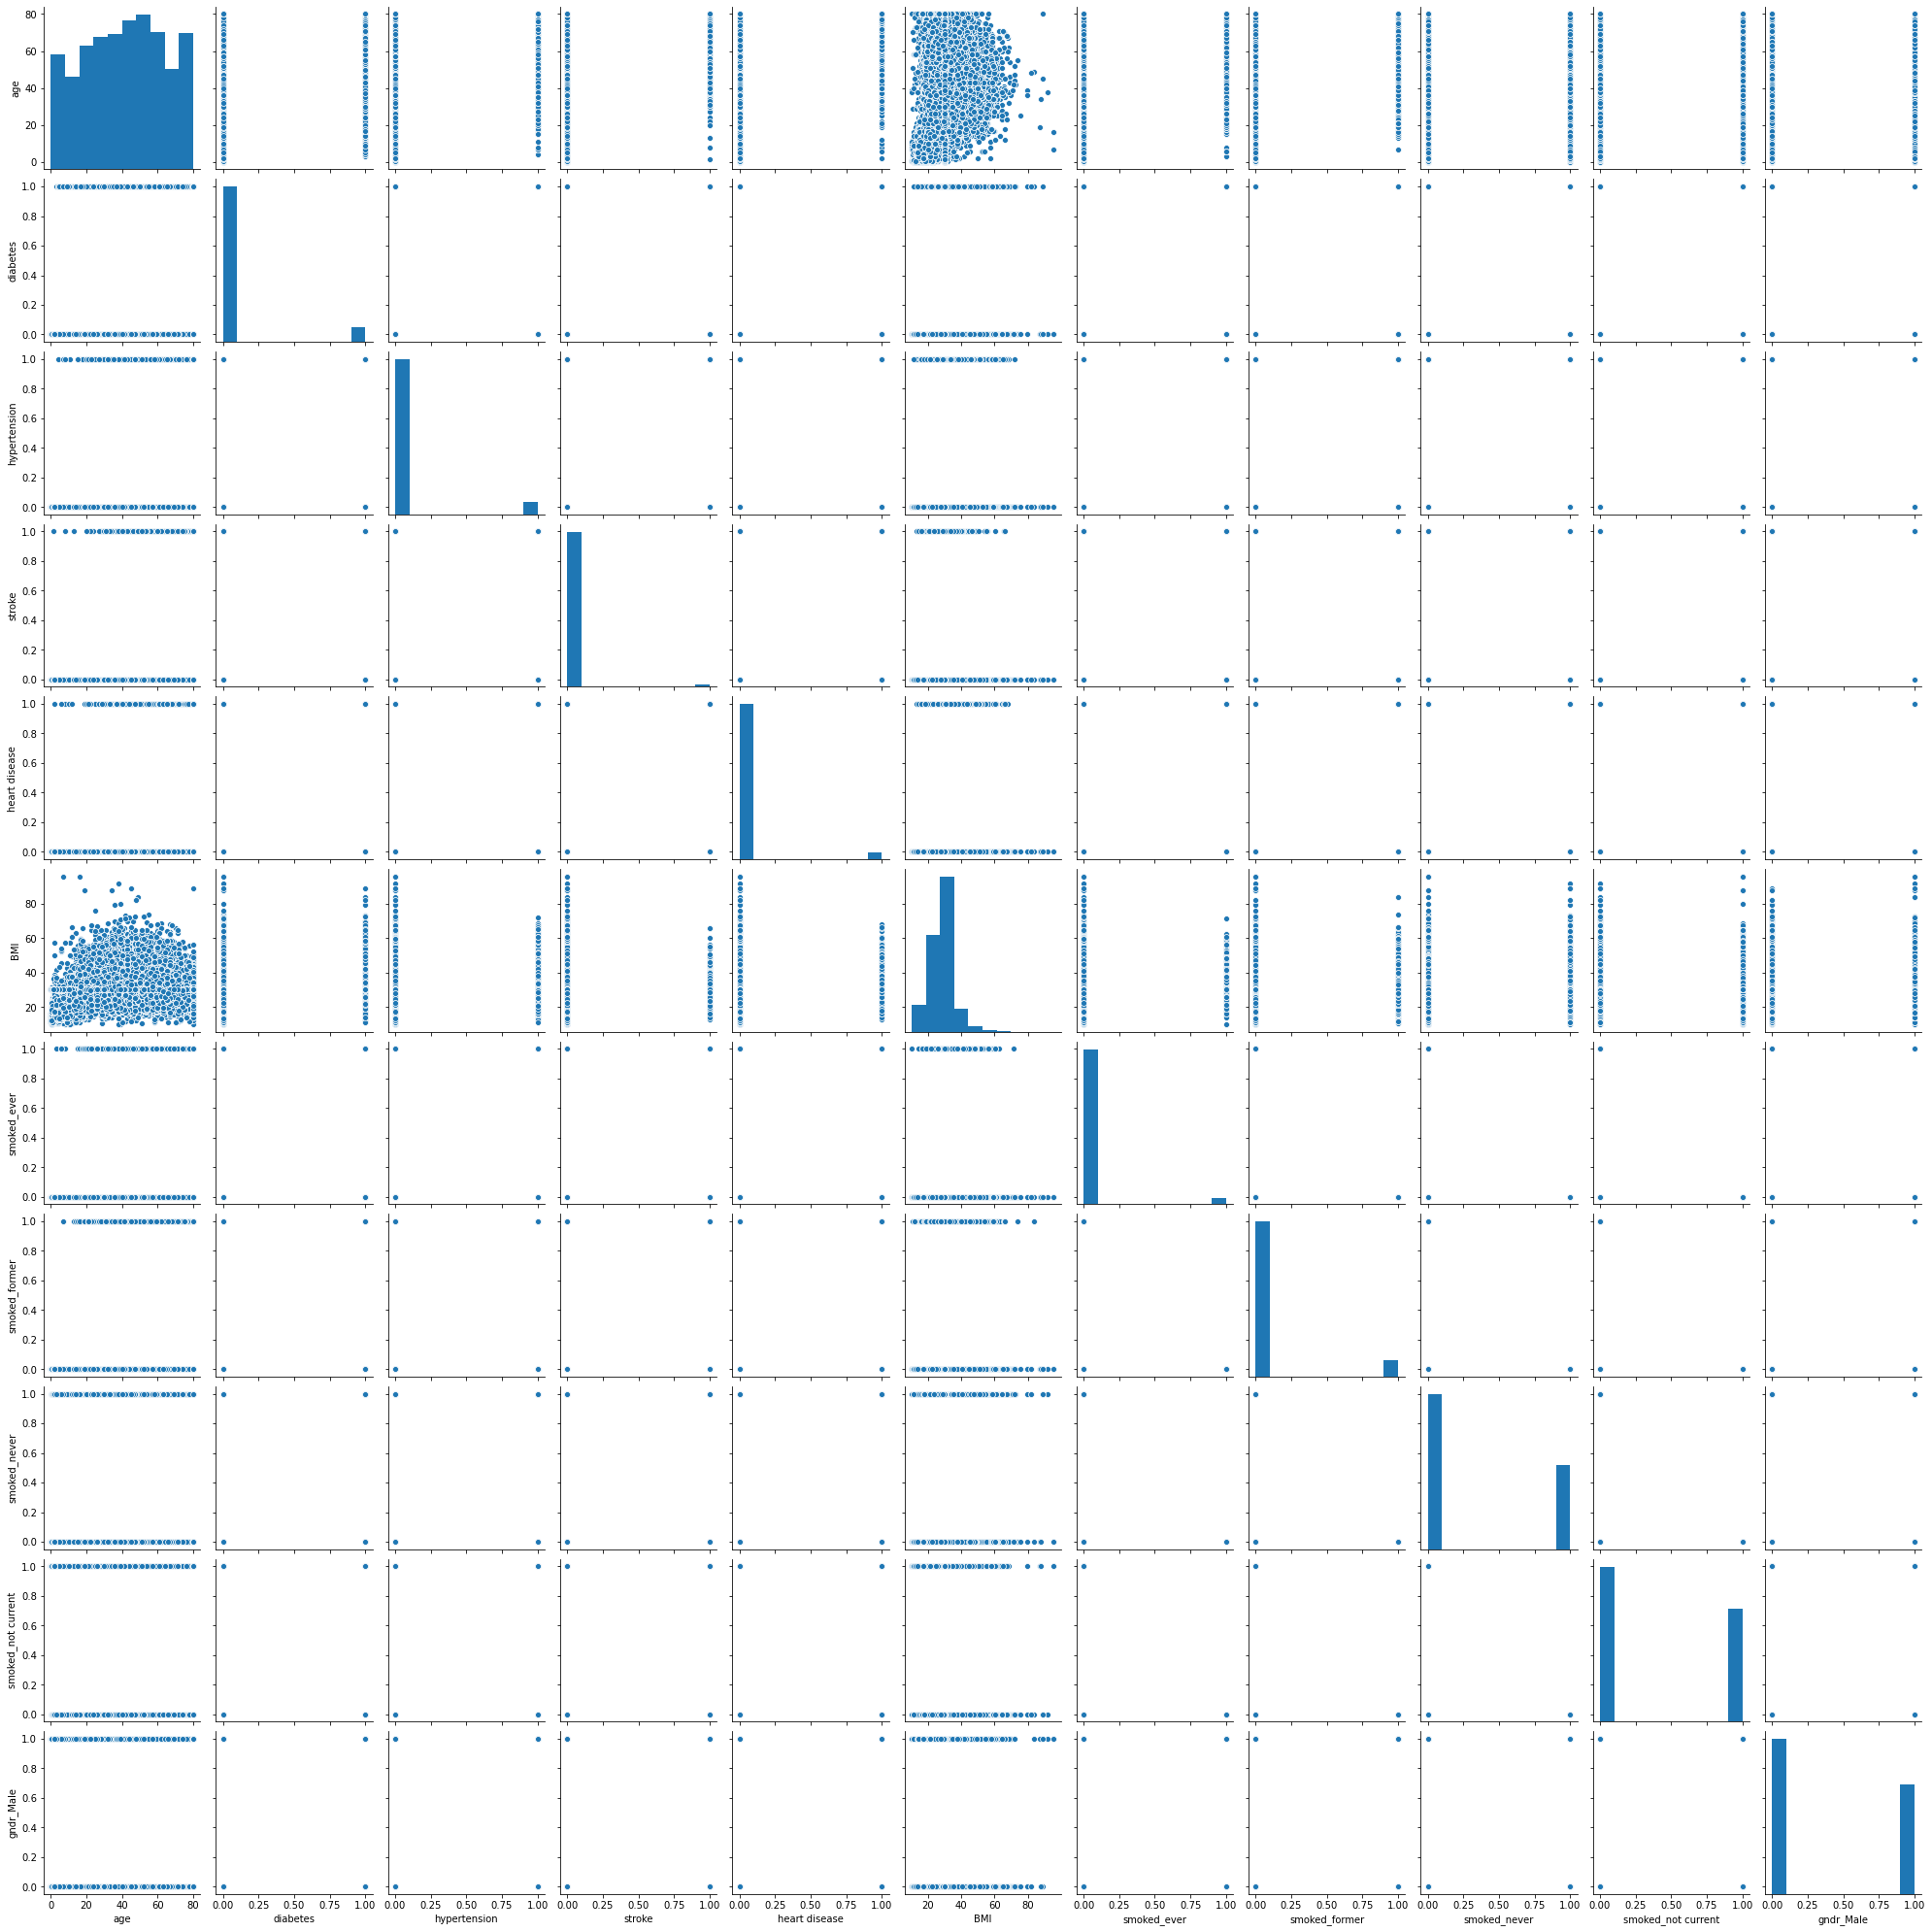

In [49]:
sns.pairplot(df)
plt.savefig("PairPlot.png")

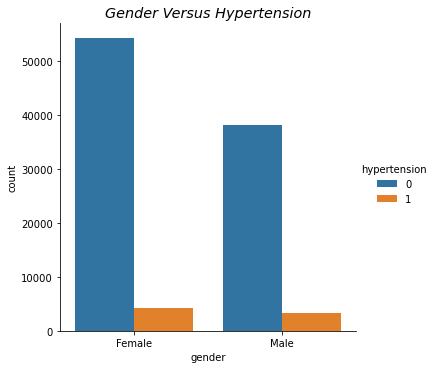

In [50]:
sns.catplot(x='gender',hue='hypertension',kind='count',data=df);
plt.title("Gender Versus Hypertension", fontstyle ='italic', fontsize = 'x-large')
plt.savefig("GenderHypertension")

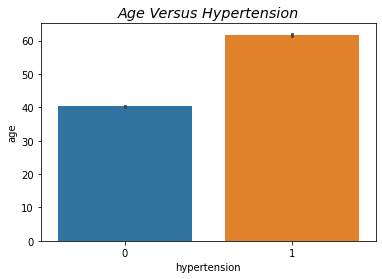

In [51]:
sns.barplot(x='hypertension',y='age',data=df)
plt.title("Age Versus Hypertension", fontstyle ='italic', fontsize = 'x-large')
plt.savefig("AgeHypertension")

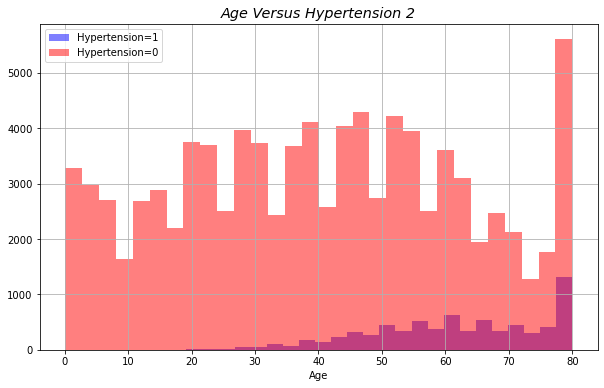

In [52]:
plt.figure(figsize=(10,6))
df[df['hypertension']==1]['age'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Hypertension=1')
df[df['hypertension']==0]['age'].hist(alpha=0.5,color='red',
                                              bins=30,label='Hypertension=0')
plt.legend()
plt.xlabel('Age')
plt.title("Age Versus Hypertension 2", fontstyle ='italic', fontsize = 'x-large')
plt.savefig("AgeHypertension2")

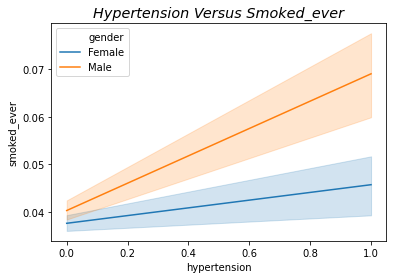

In [53]:
ax = sns.lineplot(x='hypertension', y='smoked_ever', hue="gender",data=df,color=('red','yellow'))
plt.title("Hypertension Versus Smoked_ever", fontstyle ='italic', fontsize = 'x-large')
plt.savefig("HypertensionSE")

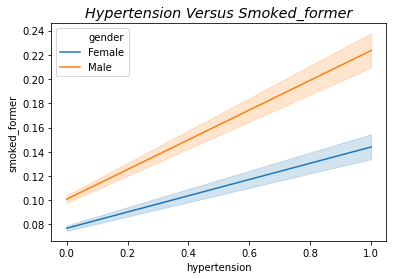

In [54]:
ax = sns.lineplot(x='hypertension', y='smoked_former', hue="gender",data=df,color=('red','yellow'))
plt.title("Hypertension Versus Smoked_former", fontstyle ='italic', fontsize = 'x-large')
plt.savefig("HypertensionSF")

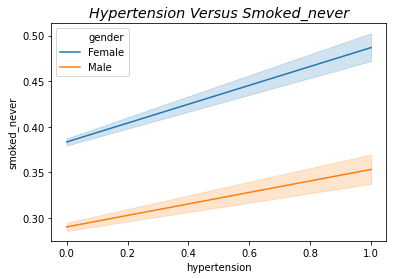

In [55]:
ax = sns.lineplot(x='hypertension', y='smoked_never', hue="gender",data=df,color=('red','yellow'))
plt.title("Hypertension Versus Smoked_never", fontstyle ='italic', fontsize = 'x-large')
plt.savefig("HypertensionSN")

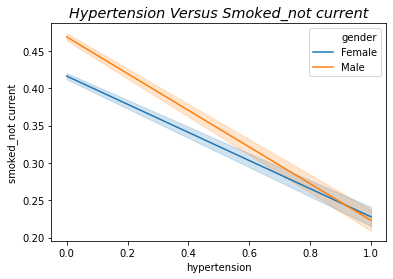

In [56]:
ax = sns.lineplot(x='hypertension', y='smoked_not current', hue="gender",data=df,color=('red','yellow'))
plt.title("Hypertension Versus Smoked_not current", fontstyle ='italic', fontsize = 'x-large')
plt.savefig("HypertensionSNC")

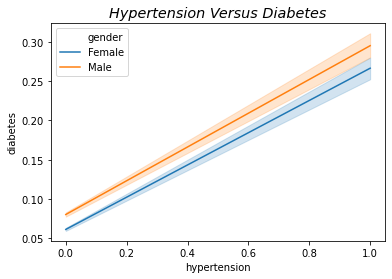

In [57]:
ax = sns.lineplot(x='hypertension', y='diabetes', hue="gender",data=df,color=('red','yellow'))
plt.title("Hypertension Versus Diabetes", fontstyle ='italic', fontsize = 'x-large')
plt.savefig("HypertensionDiabetes")

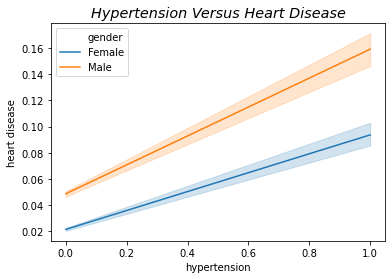

In [58]:
ax = sns.lineplot(x='hypertension', y='heart disease', hue="gender",data=df,color=('red','yellow'))
plt.title("Hypertension Versus Heart Disease", fontstyle ='italic', fontsize = 'x-large')
plt.savefig("HypertensionHeartDisease")

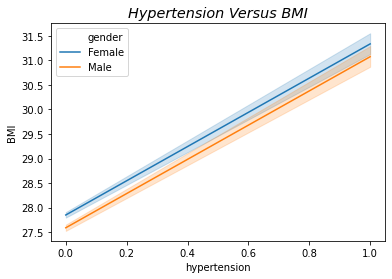

In [59]:
ax = sns.lineplot(x='hypertension', y='BMI', hue="gender",data=df,color=('red','yellow'))
plt.title("Hypertension Versus BMI", fontstyle ='italic', fontsize = 'x-large')
plt.savefig("HypertensionBMI")

In [ ]:
    `